In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score, roc_auc_score,
    mean_squared_error, mean_absolute_error, r2_score, roc_curve
)
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import time

In [ ]:
df=pd.read_csv('HeartDiseaseTrain-Test.csv')
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


#Preprocessing


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_blood_pressure,0
cholestoral,0
fasting_blood_sugar,0
rest_ecg,0
Max_heart_rate,0
exercise_induced_angina,0
oldpeak,0


In [ ]:
df.dtypes

,0
age,int64
sex,object
chest_pain_type,object
resting_blood_pressure,int64
cholestoral,int64
fasting_blood_sugar,object
rest_ecg,object
Max_heart_rate,int64
exercise_induced_angina,object
oldpeak,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [ ]:
df.duplicated().sum()

np.int64(723)

In [ ]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of       age     sex  chest_pain_type  resting_blood_pressure  cholestoral  \
0      52    Male   Typical angina                     125          212   
1      53    Male   Typical angina                     140          203   
2      70    Male   Typical angina                     145          174   
3      61    Male   Typical angina                     148          203   
4      62  Female   Typical angina                     138          294   
...   ...     ...              ...                     ...          ...   
1020   59    Male  Atypical angina                     140          221   
1021   60    Male   Typical angina                     125          258   
1022   47    Male   Typical angina                     110          275   
1023   50  Female   Typical angina                     110          254   
1024   54    Male   Typical angina                     120          188   

         fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0       Lower than 120 mg/ml  ST-T wave abnormality             168   
1     Greater than 120 mg/ml                 Normal             155   
2       Lower than 120 mg/ml  ST-T wave abnormality             125   
3       Lower than 120 mg/ml  ST-T wave abnormality             161   
4     Greater than 120 mg/ml  ST-T wave abnormality             106   
...                      ...                    ...             ...   
1020    Lower than 120 mg/ml  ST-T wave abnormality             164   
1021    Lower than 120 mg/ml                 Normal             141   
1022    Lower than 120 mg/ml                 Normal             118   
1023    Lower than 120 mg/ml                 Normal             159   
1024    Lower than 120 mg/ml  ST-T wave abnormality             113   

     exercise_induced_angina  oldpeak        slope  \
0                         No      1.0  Downsloping   
1                        Yes      3.1    Upsloping   
2                        Yes      2.6    Upsloping   
3                         No      0.0  Downsloping   
4                         No      1.9         Flat   
...                      ...      ...          ...   
1020                     Yes      0.0  Downsloping   
1021                     Yes      2.8         Flat   
1022                     Yes      1.0         Flat   
1023                      No      0.0  Downsloping   
1024                      No      1.4         Flat   

     vessels_colored_by_flourosopy        thalassemia  target  
0                              Two  Reversable Defect       0  
1                             Zero  Reversable Defect       0  
2                             Zero  Reversable Defect       0  
3                              One  Reversable Defect       0  
4                            Three       Fixed Defect       0  
...                            ...                ...     ...  
1020                          Zero       Fixed Defect       1  
1021                           One  Reversable Defect       0  
1022                           One       Fixed Defect       0  
1023                          Zero       Fixed Defect       1  
1024                           One  Reversable Defect       0  

[1025 rows x 14 columns]>

#Plots to understand the data


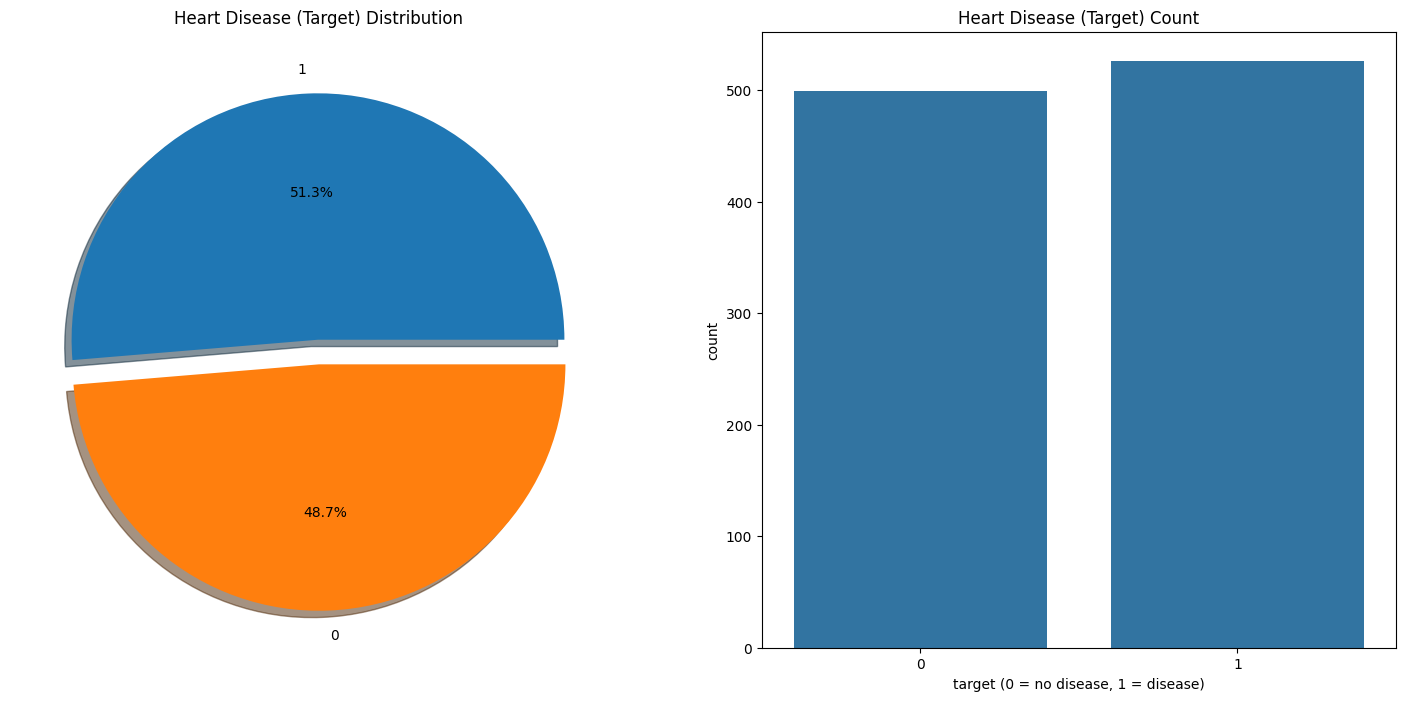

In [ ]:
# Class distribution (Heart Disease)
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart of target distribution
df['target'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Heart Disease (Target) Distribution')
ax[0].set_ylabel('')

# Count plot of target classes
sns.countplot(x='target', data=df, ax=ax[1])
ax[1].set_title('Heart Disease (Target) Count')
ax[1].set_xlabel('target (0 = no disease, 1 = disease)')

plt.show()

# Encoding, Splitting, SCaling,feature caling


---




In [ ]:
# Encoding categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

display(df.head())

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,1,2,168,0,1.0,0,3,3,0
1,53,1,3,140,203,0,1,155,1,3.1,2,4,3,0
2,70,1,3,145,174,1,2,125,1,2.6,2,4,3,0
3,61,1,3,148,203,1,2,161,0,0.0,0,1,3,0
4,62,0,3,138,294,0,2,106,0,1.9,1,2,0,0


In [ ]:
# Splitting features and target
X = df.drop('target', axis=1)
y = df['target']

display(X.head())
display(y.head())

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia
0,52,1,3,125,212,1,2,168,0,1.0,0,3,3
1,53,1,3,140,203,0,1,155,1,3.1,2,4,3
2,70,1,3,145,174,1,2,125,1,2.6,2,4,3
3,61,1,3,148,203,1,2,161,0,0.0,0,1,3
4,62,0,3,138,294,0,2,106,0,1.9,1,2,0


,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Splitting into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42) # 60% train, 40% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # 20% val, 20% test from temp

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (615, 13)
Shape of X_val: (205, 13)
Shape of X_test: (205, 13)
Shape of y_train: (615,)
Shape of y_val: (205,)
Shape of y_test: (205,)


In [ ]:
# Scaling numerical features
scaler = StandardScaler()

# Identify numerical columns (excluding the target and already encoded categorical ones)
# Assuming all columns except 'target' are numerical after encoding, or should be scaled if they were originally numerical
numerical_cols = X_train.select_dtypes(include=np.number).columns

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Scaled X_train:")
display(X_train.head())
print("\nScaled X_val:")
display(X_val.head())
print("\nScaled X_test:")
display(X_test.head())

Scaled X_train:


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia
234,-0.599925,-1.536443,0.859626,-0.086080,0.512694,0.41673,0.990095,0.579134,-0.699360,-0.916200,-0.984420,0.760064,-0.938445
220,0.269224,-1.536443,-1.201465,-0.086080,-0.184654,0.41673,-0.936830,1.070708,-0.699360,-0.916200,0.665221,-1.584950,-0.938445
506,0.703799,0.650854,0.859626,-0.657160,0.322509,0.41673,0.990095,-0.448702,1.429879,2.293907,0.665221,-1.584950,1.135125
678,-1.469074,-1.536443,-0.170920,-1.114024,0.491563,0.41673,-0.936830,0.981331,1.429879,-0.916200,-0.984420,0.760064,-0.938445
132,-1.469074,0.650854,-1.201465,0.199460,-0.882002,0.41673,0.990095,-0.806210,-0.699360,-0.916200,0.665221,0.760064,0.443935



Scaled X_val:


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia
584,0.051937,0.650854,0.859626,0.028136,2.287763,0.41673,0.990095,-0.806210,1.429879,0.153836,0.665221,-1.584950,1.135125
898,-1.360430,-1.536443,0.859626,-1.685104,0.428167,0.41673,-0.936830,-1.253095,-0.699360,-0.381182,0.665221,0.760064,-0.938445
448,-0.382638,-1.536443,-0.170920,-0.657160,1.062120,0.41673,-0.936830,0.311003,-0.699360,-0.381182,-0.984420,0.760064,-0.938445
408,-0.925856,-1.536443,0.859626,0.370784,-0.036731,0.41673,-0.936830,0.087560,1.429879,-0.916200,0.665221,0.760064,-0.938445
136,0.051937,-1.536443,-1.201465,0.028136,2.055313,0.41673,0.990095,0.713200,-0.699360,0.153836,-0.984420,0.760064,-0.938445



Scaled X_test:


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia
965,2.333453,-1.536443,-0.170920,0.485000,-1.008793,0.416730,-2.863755,-1.521227,-0.69936,0.064666,0.665221,0.760064,-0.938445
973,-0.382638,0.650854,-0.170920,-0.371620,0.005532,-2.399634,-0.936830,0.713200,-0.69936,1.223872,0.665221,0.760064,-0.938445
922,-1.143143,0.650854,-1.201465,-0.657160,0.385904,0.416730,0.990095,1.026020,-0.69936,-0.916200,-0.984420,0.760064,1.135125
580,-0.925856,0.650854,-1.201465,-1.742212,-1.008793,-2.399634,0.990095,0.266315,-0.69936,-0.916200,-0.984420,0.760064,1.135125
3,0.703799,0.650854,0.859626,0.941864,-0.882002,0.416730,0.990095,0.489757,-0.69936,-0.916200,-0.984420,-1.584950,1.135125


In [ ]:
# Feature Selection using SelectKBest
# Using f_classif for classification tasks
selector = SelectKBest(score_func=f_classif, k='all') # Select all features for now to see scores
selector.fit(X_train, y_train)

# Get the scores and p-values
scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame to display feature importance
feature_scores = pd.DataFrame({'Feature': X_train.columns, 'F-Score': scores, 'P-Value': p_values})
feature_scores = feature_scores.sort_values(by='F-Score', ascending=False)

print("Feature Scores:")
display(feature_scores)

# You can then decide on the number of features to select based on these scores and your analysis.
# For example, to select the top k features:
# k_best_features = feature_scores.head(k)['Feature'].tolist()
# X_train_new = selector.transform(X_train)[:, selector.get_support()]
# X_val_new = selector.transform(X_val)[:, selector.get_support()]
# X_test_new = selector.transform(X_test)[:, selector.get_support()]

Feature Scores:


,Feature,F-Score,P-Value
12,thalassemia,248.378881,3.132953e-47
9,oldpeak,159.072968,1.373206e-32
7,Max_heart_rate,126.692842,7.589383e-27
2,chest_pain_type,117.830129,3.144916e-25
8,exercise_induced_angina,106.135298,4.610047e-23
10,slope,78.492867,8.646991e-18
11,vessels_colored_by_flourosopy,74.225794,5.906222e-17
1,sex,49.416692,5.536118e-12
0,age,31.671724,2.779592e-08
4,cholestoral,19.677075,1.086990e-05


In [ ]:
# Select the top 8 features plus the target variable
k = 8
top_k_features = feature_scores.head(k)['Feature'].tolist()
features_with_target = top_k_features + ['target']

# Create new DataFrames with selected features
X_train_selected = X_train[top_k_features]
X_val_selected = X_val[top_k_features]
X_test_selected = X_test[top_k_features]

print(f"Shape of X_train_selected: {X_train_selected.shape}")
print(f"Shape of X_val_selected: {X_val_selected.shape}")
print(f"Shape of X_test_selected: {X_test_selected.shape}")

print("\nX_train_selected head:")
display(X_train_selected.head())

Shape of X_train_selected: (615, 8)
Shape of X_val_selected: (205, 8)
Shape of X_test_selected: (205, 8)

X_train_selected head:


,thalassemia,oldpeak,Max_heart_rate,chest_pain_type,exercise_induced_angina,slope,vessels_colored_by_flourosopy,sex
234,-0.938445,-0.916200,0.579134,0.859626,-0.699360,-0.984420,0.760064,-1.536443
220,-0.938445,-0.916200,1.070708,-1.201465,-0.699360,0.665221,-1.584950,-1.536443
506,1.135125,2.293907,-0.448702,0.859626,1.429879,0.665221,-1.584950,0.650854
678,-0.938445,-0.916200,0.981331,-0.170920,1.429879,-0.984420,0.760064,-1.536443
132,0.443935,-0.916200,-0.806210,-1.201465,-0.699360,0.665221,0.760064,0.650854


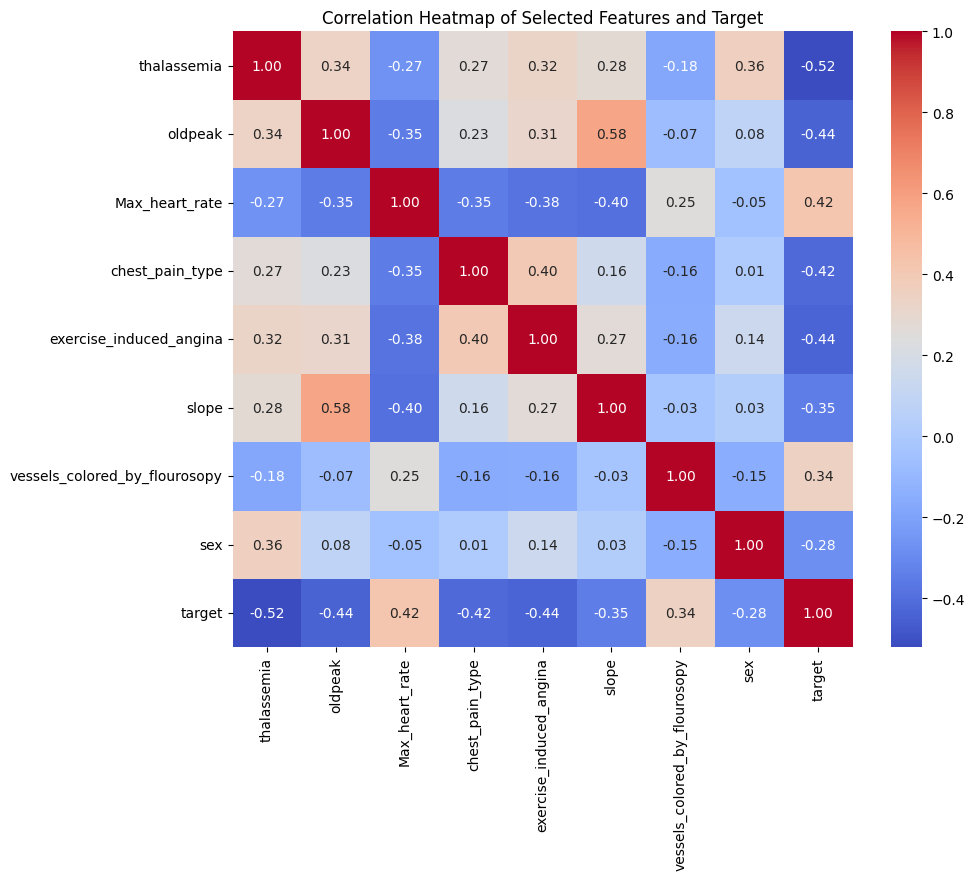

In [ ]:
# Calculate correlation matrix for selected features and target
corr_matrix_selected_with_target = df[features_with_target].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_selected_with_target, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features and Target')
plt.show()


# Logistic Regession


LogReg  Acc for test: 0.9073170731707317
 Prec: 0.8813559322033898
 Rec: 0.9541284403669725
 F1: 0.9162995594713657
Logistic Regression Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Validation Accuracy: 0.8439
Logistic Regression Validation Precision: 0.8073
Logistic Regression Validation Recall: 0.8889
Logistic Regression Validation F1-Score: 0.8462
Logistic Regression Validation ROC AUC: 0.9204


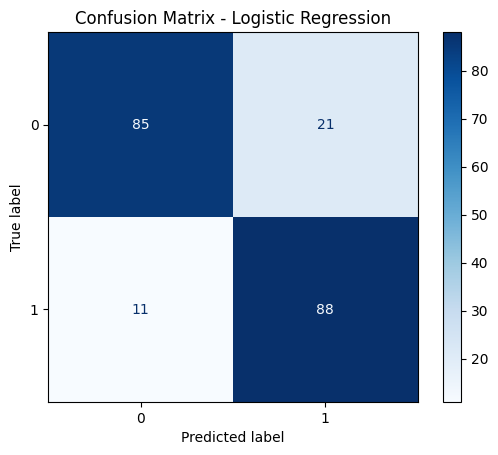

,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,0.1,l2,liblinear,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.747967,0.845528,0.837398,0.861789,0.837398,0.826016,7
1,0.1,l2,newton-cg,"{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-...",0.747967,0.845528,0.837398,0.861789,0.837398,0.826016,7
2,0.1,l2,lbfgs,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.747967,0.845528,0.837398,0.861789,0.837398,0.826016,7
3,1.0,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.764228,0.861789,0.829268,0.861789,0.837398,0.830894,4
4,1.0,l2,newton-cg,"{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}",0.764228,0.861789,0.829268,0.861789,0.837398,0.830894,4
5,1.0,l2,lbfgs,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.764228,0.861789,0.829268,0.861789,0.837398,0.830894,4
6,10.0,l2,liblinear,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.764228,0.861789,0.837398,0.861789,0.837398,0.832520,1
7,10.0,l2,newton-cg,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}",0.764228,0.861789,0.837398,0.861789,0.837398,0.832520,1
8,10.0,l2,lbfgs,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",0.764228,0.861789,0.837398,0.861789,0.837398,0.832520,1


In [ ]:
# Logistic Regression - Hyperparameter Tuning and Evaluation
# Define the parameters to try for Logistic Regression
lr_param_grid = {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['liblinear', 'newton-cg', 'lbfgs']}

# Set up and run GridSearchCV
lr_grid_search = GridSearchCV(LogisticRegression(max_iter=1000), lr_param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train_selected, y_train)

# Get the best model and evaluate on validation set
tuned_lr_model = lr_grid_search.best_estimator_
y_val_pred_lr_tuned = tuned_lr_model.predict(X_val_selected)

# Calculate and print key evaluation metrics
accuracy_lr = accuracy_score(y_val, y_val_pred_lr_tuned)
precision_lr = precision_score(y_val, y_val_pred_lr_tuned)
recall_lr = recall_score(y_val, y_val_pred_lr_tuned)
f1_lr = f1_score(y_val, y_val_pred_lr_tuned)
roc_auc_lr = roc_auc_score(y_val, tuned_lr_model.predict_proba(X_val_selected)[:, 1])
print("LogReg  Acc for test:", accuracy_score(y_test,y_pred))
print(" Prec:", precision_score(y_test,y_pred,zero_division=0))
print(" Rec:", recall_score(y_test,y_pred))
print(" F1:", f1_score(y_test,y_pred))



print("Logistic Regression Best Parameters:", lr_grid_search.best_params_)
print(f"Logistic Regression Validation Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression Validation Precision: {precision_lr:.4f}")
print(f"Logistic Regression Validation Recall: {recall_lr:.4f}")
print(f"Logistic Regression Validation F1-Score: {f1_lr:.4f}")
print(f"Logistic Regression Validation ROC AUC: {roc_auc_lr:.4f}")
cm = confusion_matrix(y_val, y_val_pred_lr_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

pd.DataFrame(lr_grid_search.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time','std_test_score'])

# Decision Tree

DecisionTree for testing acc: 0.9073170731707317
 Prec: 0.8813559322033898
 Rec: 0.9541284403669725
 F1: 0.9162995594713657
Decision Tree Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Validation Accuracy: 0.9854
Decision Tree Validation Precision: 1.0000
Decision Tree Validation Recall: 0.9697
Decision Tree Validation F1-Score: 0.9846
Decision Tree Validation ROC AUC: 0.9848


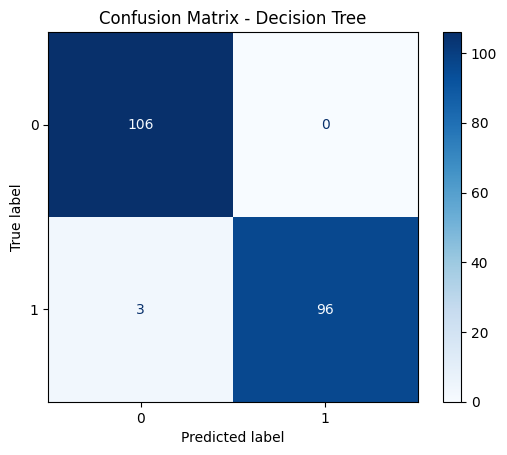

,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,gini,None,1,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.943089,0.991870,0.926829,0.975610,0.934959,0.954472,1
1,gini,None,1,5,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.878049,0.943089,0.902439,0.918699,0.894309,0.907317,16
2,gini,None,1,10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.861789,0.886179,0.878049,0.886179,0.853659,0.873171,38
3,gini,None,2,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.853659,0.918699,0.886179,0.902439,0.869919,0.886179,26
4,gini,None,2,5,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.821138,0.918699,0.878049,0.894309,0.869919,0.876423,35
...,...,...,...,...,...,...,...,...,...,...,...,...
67,entropy,30,2,5,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.910569,0.918699,0.918699,0.902439,0.869919,0.904065,17
68,entropy,30,2,10,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.804878,0.886179,0.861789,0.869919,0.894309,0.863415,42
69,entropy,30,4,2,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.796748,0.845528,0.837398,0.910569,0.821138,0.842276,51
70,entropy,30,4,5,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.796748,0.861789,0.845528,0.910569,0.804878,0.843902,49


In [ ]:
# Decision Tree - Hyperparameter Tuning and Evaluation
# Define the parameters to try for Decision Tree
dt_param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy']}

# Set up and run GridSearchCV
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train_selected, y_train)

# Get the best model and evaluate on validation set
tuned_dt_model = dt_grid_search.best_estimator_
y_val_pred_dt_tuned = tuned_dt_model.predict(X_val_selected)

# Calculate and print key evaluation metrics
accuracy_dt = accuracy_score(y_val, y_val_pred_dt_tuned)
precision_dt = precision_score(y_val, y_val_pred_dt_tuned)
recall_dt = recall_score(y_val, y_val_pred_dt_tuned)
f1_dt = f1_score(y_val, y_val_pred_dt_tuned)
roc_auc_dt = roc_auc_score(y_val, tuned_dt_model.predict_proba(X_val_selected)[:, 1])
print("DecisionTree for testing acc:", accuracy_score(y_test,y_pred)),
print(" Prec:", precision_score(y_test,y_pred,zero_division=0)),
print(" Rec:", recall_score(y_test,y_pred)),
print(" F1:", f1_score(y_test,y_pred))


print("Decision Tree Best Parameters:", dt_grid_search.best_params_)
print(f"Decision Tree Validation Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree Validation Precision: {precision_dt:.4f}")
print(f"Decision Tree Validation Recall: {recall_dt:.4f}")
print(f"Decision Tree Validation F1-Score: {f1_dt:.4f}")
print(f"Decision Tree Validation ROC AUC: {roc_auc_dt:.4f}")
cm = confusion_matrix(y_val, y_val_pred_dt_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.show()
pd.DataFrame(dt_grid_search.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time','std_test_score'])

# Random Forest


RandomForest → Acc: 0.9073170731707317
 Prec: 0.8813559322033898
 Rec: 0.9541284403669725
 F1: 0.9162995594713657
Random Forest Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Validation Accuracy: 1.0000
Random Forest Validation Precision: 1.0000
Random Forest Validation Recall: 1.0000
Random Forest Validation F1-Score: 1.0000
Random Forest Validation ROC AUC: 1.0000


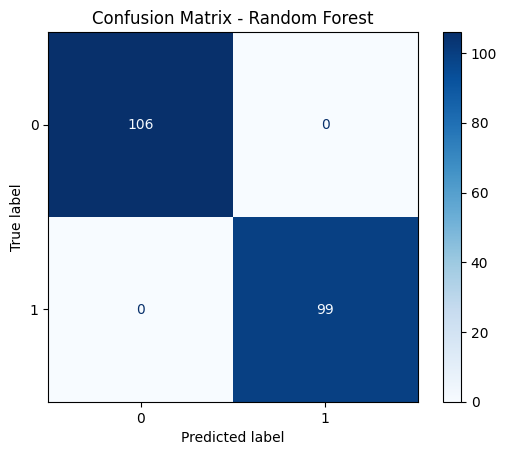

,param_bootstrap,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,True,None,1,2,100,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.951220,0.975610,0.943089,0.975610,0.926829,0.954472,3
1,True,None,1,2,200,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.951220,0.991870,0.934959,0.983740,0.910569,0.954472,3
2,True,None,1,2,300,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.951220,0.991870,0.934959,0.975610,0.926829,0.956098,1
3,True,None,1,5,100,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.934959,0.934959,0.910569,0.959350,0.845528,0.917073,37
4,True,None,1,5,200,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.943089,0.926829,0.910569,0.951220,0.837398,0.913821,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,False,20,2,2,200,"{'bootstrap': False, 'max_depth': 20, 'min_sam...",0.934959,0.951220,0.902439,0.959350,0.878049,0.925203,30
68,False,20,2,2,300,"{'bootstrap': False, 'max_depth': 20, 'min_sam...",0.934959,0.951220,0.902439,0.951220,0.886179,0.925203,30
69,False,20,2,5,100,"{'bootstrap': False, 'max_depth': 20, 'min_sam...",0.943089,0.934959,0.902439,0.943089,0.853659,0.915447,39
70,False,20,2,5,200,"{'bootstrap': False, 'max_depth': 20, 'min_sam...",0.943089,0.934959,0.902439,0.943089,0.853659,0.915447,39


In [ ]:
# Random Forest - Hyperparameter Tuning and Evaluation
# Define the parameters to try for Random Forest
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}

# Set up and run GridSearchCV
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train_selected, y_train)

# Get the best model and evaluate on validation set
tuned_rf_model = rf_grid_search.best_estimator_
y_val_pred_rf_tuned = tuned_rf_model.predict(X_val_selected)

# Calculate and print key evaluation metrics
accuracy_rf = accuracy_score(y_val, y_val_pred_rf_tuned)
precision_rf = precision_score(y_val, y_val_pred_rf_tuned)
recall_rf = recall_score(y_val, y_val_pred_rf_tuned)
f1_rf = f1_score(y_val, y_val_pred_rf_tuned)
roc_auc_rf = roc_auc_score(y_val, tuned_rf_model.predict_proba(X_val_selected)[:, 1])
print("RandomForest  Acc in test:", accuracy_score(y_test,y_pred))
print(" Prec:", precision_score(y_test,y_pred,zero_division=0))
print(" Rec:", recall_score(y_test,y_pred)),
print(" F1:", f1_score(y_test,y_pred))
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print(f"Random Forest Validation Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Validation Precision: {precision_rf:.4f}")
print(f"Random Forest Validation Recall: {recall_rf:.4f}")
print(f"Random Forest Validation F1-Score: {f1_rf:.4f}")
print(f"Random Forest Validation ROC AUC: {roc_auc_rf:.4f}")
cm = confusion_matrix(y_val, y_val_pred_rf_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()
pd.DataFrame(rf_grid_search.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time','std_test_score'])

# SVM

SVM Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Validation Accuracy: 0.9317
SVM Validation Precision: 0.8972
SVM Validation Recall: 0.9697
SVM Validation F1-Score: 0.9320
SVM Validation ROC AUC: 0.9844


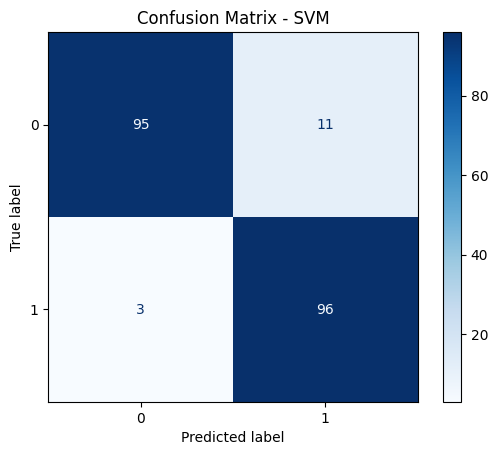

,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,0.1,scale,linear,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.788618,0.861789,0.837398,0.821138,0.829268,0.827642,7
1,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.772358,0.853659,0.837398,0.869919,0.837398,0.834146,5
2,0.1,auto,linear,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}",0.788618,0.861789,0.837398,0.821138,0.829268,0.827642,7
3,0.1,auto,rbf,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}",0.772358,0.853659,0.837398,0.869919,0.837398,0.834146,5
4,1.0,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.796748,0.861789,0.837398,0.821138,0.821138,0.827642,7
5,1.0,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.804878,0.910569,0.861789,0.910569,0.845528,0.866667,3
6,1.0,auto,linear,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.796748,0.861789,0.837398,0.821138,0.821138,0.827642,7
7,1.0,auto,rbf,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.804878,0.910569,0.861789,0.910569,0.845528,0.866667,3
8,10.0,scale,linear,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",0.788618,0.861789,0.837398,0.821138,0.829268,0.827642,7
9,10.0,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.918699,0.934959,0.878049,0.951220,0.837398,0.904065,1


In [ ]:

# SVM - Hyperparameter Tuning and Evaluation
# Define the parameters to try for SVM
# probability=True is needed for ROC AUC
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

# Set up and run GridSearchCV
svm_grid_search = GridSearchCV(SVC(probability=True), svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train_selected, y_train)

# Get the best model and evaluate on validation set
tuned_svm_model = svm_grid_search.best_estimator_
y_val_pred_svm_tuned = tuned_svm_model.predict(X_val_selected)

# Calculate and print key evaluation metrics
accuracy_svm = accuracy_score(y_val, y_val_pred_svm_tuned)
precision_svm = precision_score(y_val, y_val_pred_svm_tuned)
recall_svm = recall_score(y_val, y_val_pred_svm_tuned)
f1_svm = f1_score(y_val, y_val_pred_svm_tuned)
roc_auc_svm = roc_auc_score(y_val, tuned_svm_model.predict_proba(X_val_selected)[:, 1])
print("SVM  Acc in test:", accuracy_score(y_test,y_pred),
print(" Prec:", precision_score(y_test,y_pred,zero_division=0))
print(" Rec:", recall_score(y_test,y_pred))
print(" F1:", f1_score(y_test,y_pred)))

print("SVM Best Parameters:", svm_grid_search.best_params_)
print(f"SVM Validation Accuracy: {accuracy_svm:.4f}")
print(f"SVM Validation Precision: {precision_svm:.4f}")
print(f"SVM Validation Recall: {recall_svm:.4f}")
print(f"SVM Validation F1-Score: {f1_svm:.4f}")
print(f"SVM Validation ROC AUC: {roc_auc_svm:.4f}")
cm = confusion_matrix(y_val, y_val_pred_svm_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.show()
pd.DataFrame(svm_grid_search.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time','std_test_score'])

#Validation , Test results

In [ ]:
val_results = []
for name, m in models.items():
    yp = m.predict(X_val_selected)
    ys = m.predict_proba(X_val_selected)[:,1]
    val_results.append([name,
                        accuracy_score(y_val, yp),
                        precision_score(y_val, yp, zero_division=0),
                        recall_score(y_val, yp),
                        f1_score(y_val, yp),
                        roc_auc_score(y_val, ys)])

val_df = pd.DataFrame(val_results, columns=["Model","Accuracy","Precision","Recall","F1","AUC"])
print(val_df.round(3))

          Model  Accuracy  Precision  Recall     F1    AUC
0        LogReg     0.844      0.807   0.889  0.846  0.920
1  DecisionTree     0.985      1.000   0.970  0.985  0.985
2  RandomForest     1.000      1.000   1.000  1.000  1.000
3           SVM     0.932      0.897   0.970  0.932  0.984


In [ ]:
test_results = []
for name, m in models.items():
    yp = m.predict(X_test_selected)
    ys = m.predict_proba(X_test_selected)[:,1]
    test_results.append([name,
                         accuracy_score(y_test, yp),
                         precision_score(y_test, yp, zero_division=0),
                         recall_score(y_test, yp),
                         f1_score(y_test, yp),
                         roc_auc_score(y_test, ys)])

test_df = pd.DataFrame(test_results, columns=["Model","Accuracy","Precision","Recall","F1","AUC"])
print(test_df.round(3))

          Model  Accuracy  Precision  Recall     F1    AUC
0        LogReg     0.834      0.844   0.844  0.844  0.893
1  DecisionTree     0.985      1.000   0.972  0.986  0.986
2  RandomForest     1.000      1.000   1.000  1.000  1.000
3           SVM     0.907      0.881   0.954  0.916  0.966


# Comparison of tuned models on validation

In [ ]:
# Compare the performance of the tuned models on the validation set

# Create a dictionary to store the metrics for each tuned model
tuned_model_metrics = {
    'Logistic Regression': {
        'Accuracy': accuracy_lr,
        'Precision': precision_lr,
        'Recall': recall_lr,
        'F1-Score': f1_lr,
        'ROC AUC': roc_auc_lr
    },
    'Decision Tree': {
        'Accuracy': accuracy_dt,
        'Precision': precision_dt,
        'Recall': recall_dt,
        'F1-Score': f1_dt,
        'ROC AUC': roc_auc_dt
    },
    'Random Forest': {
        'Accuracy': accuracy_rf,
        'Precision': precision_rf,
        'Recall': recall_rf,
        'F1-Score': f1_rf,
        'ROC AUC': roc_auc_rf
    },
    'SVM': {
        'Accuracy': accuracy_svm,
        'Precision': precision_svm,
        'Recall': recall_svm,
        'F1-Score': f1_svm,
        'ROC AUC': roc_auc_svm
    }
}

# Convert the dictionary to a pandas DataFrame for easy comparison
tuned_model_metrics_df = pd.DataFrame(tuned_model_metrics).T # .T transposes the DataFrame

print("Comparison of Tuned Model Performance on Validation Set:")
display(tuned_model_metrics_df)

# You can now easily compare the metrics to choose the best model based on your criteria.
# For example, to find the model with the highest accuracy:
# best_model_name_by_accuracy = tuned_model_metrics_df['Accuracy'].idxmax()
# print(f"\nBest model by Accuracy: {best_model_name_by_accuracy}")

Comparison of Tuned Model Performance on Validation Set:


,Accuracy,Precision,Recall,F1-Score,ROC AUC
Logistic Regression,0.843902,0.807339,0.888889,0.846154,0.920431
Decision Tree,0.985366,1.000000,0.969697,0.984615,0.984848
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
SVM,0.931707,0.897196,0.969697,0.932039,0.984372


# Comparison Plots

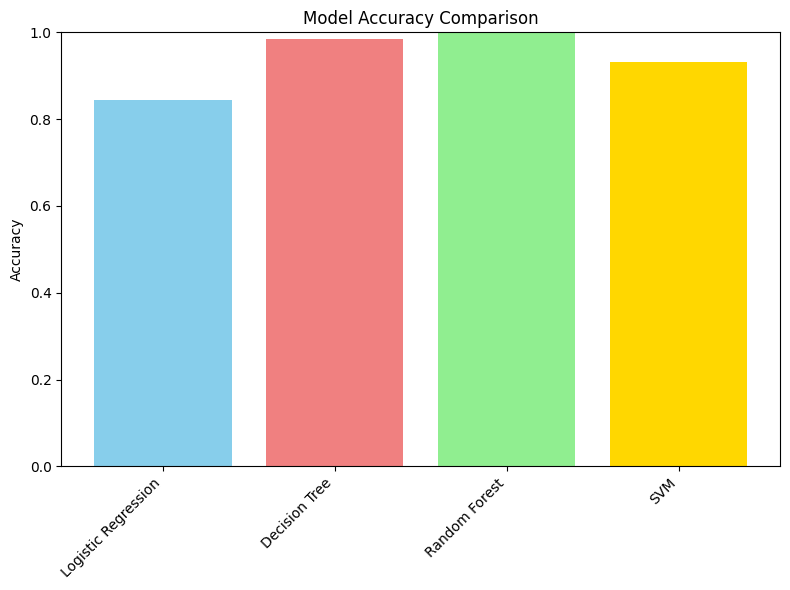

In [ ]:
# Plotting Accuracy Comparison
plt.figure(figsize=(8, 6))
plt.bar(tuned_model_metrics_df.index, tuned_model_metrics_df['Accuracy'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

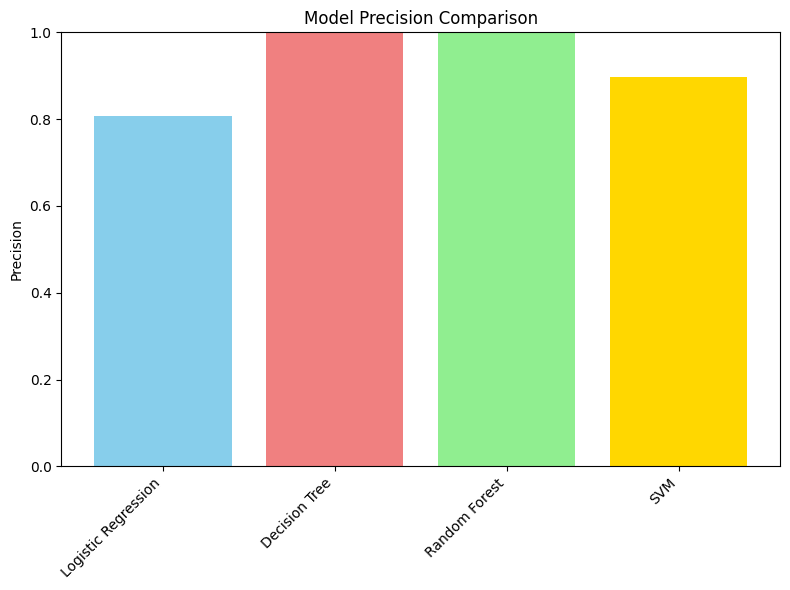

In [ ]:
# Plotting Precision Comparison
plt.figure(figsize=(8, 6))
plt.bar(tuned_model_metrics_df.index, tuned_model_metrics_df['Precision'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Model Precision Comparison')
plt.ylabel('Precision')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

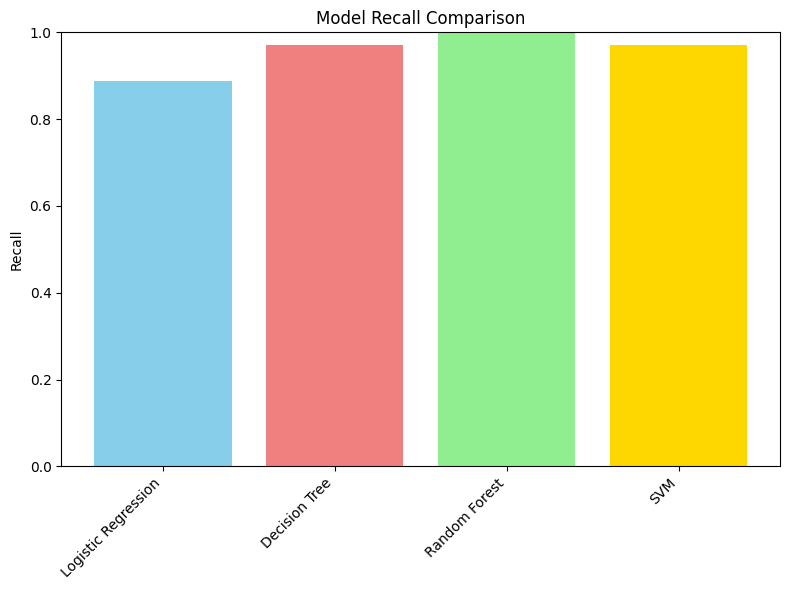

In [ ]:
# Plotting Recall Comparison
plt.figure(figsize=(8, 6))
plt.bar(tuned_model_metrics_df.index, tuned_model_metrics_df['Recall'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Model Recall Comparison')
plt.ylabel('Recall')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

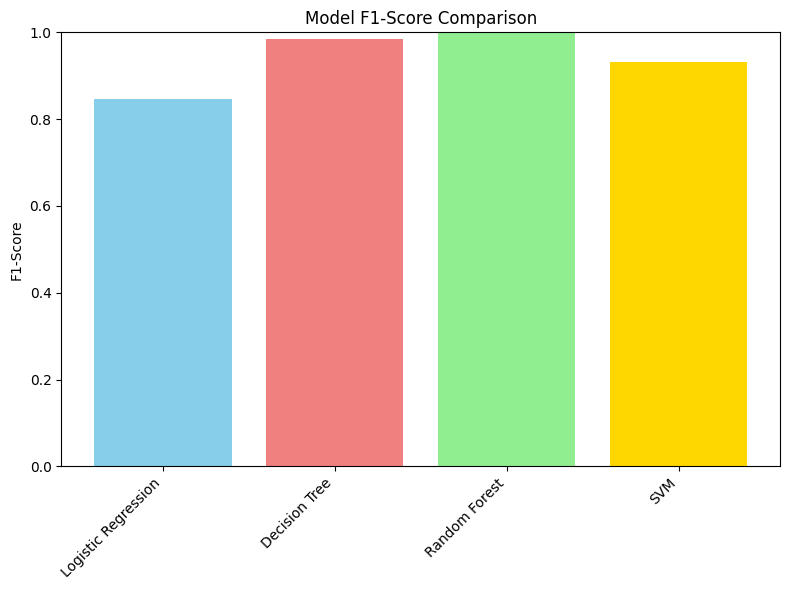

In [ ]:
# Plotting F1-Score Comparison
plt.figure(figsize=(8, 6))
plt.bar(tuned_model_metrics_df.index, tuned_model_metrics_df['F1-Score'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Model F1-Score Comparison')
plt.ylabel('F1-Score')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

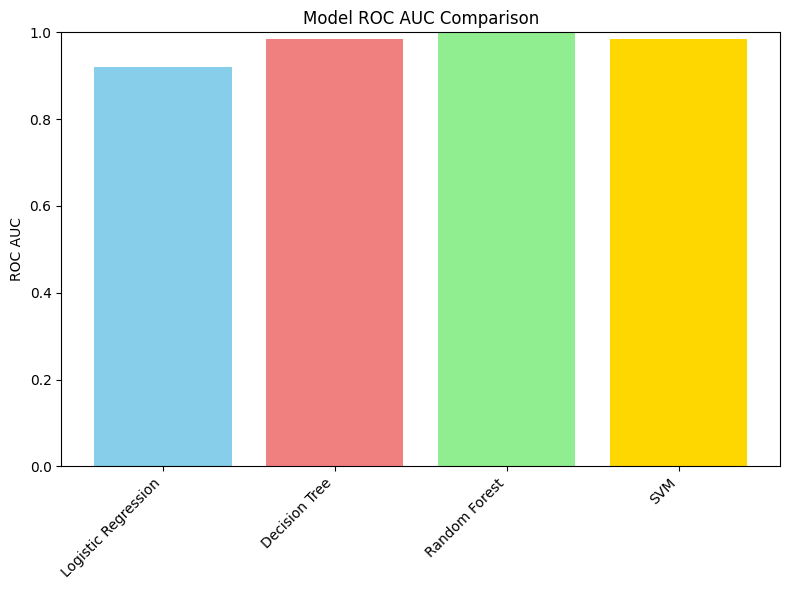

In [ ]:
# Plotting ROC AUC Comparison
plt.figure(figsize=(8, 6))
plt.bar(tuned_model_metrics_df.index, tuned_model_metrics_df['ROC AUC'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Model ROC AUC Comparison')
plt.ylabel('ROC AUC')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

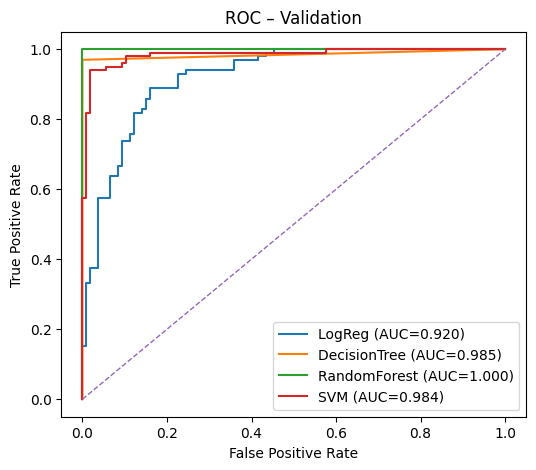

In [ ]:
models = {
    "LogReg": lr_grid_search.best_estimator_,
    "DecisionTree": dt_grid_search.best_estimator_,
    "RandomForest": rf_grid_search.best_estimator_,
    "SVM": svm_grid_search.best_estimator_,  # needs probability=True
}

plt.figure(figsize=(6,5))
for name, m in models.items():
    s = m.predict_proba(X_val_selected)[:,1] if hasattr(m, "predict_proba") else m.decision_function(X_val_selected)
    fpr, tpr, _ = roc_curve(y_val, s)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_val, s):.3f})")
plt.plot([0,1],[0,1],'--',lw=1)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC – Validation"); plt.legend(); plt.show()

# Training results

In [ ]:
models = {
    "LogReg": lr_grid_search.best_estimator_,
    "DecisionTree": dt_grid_search.best_estimator_,
    "RandomForest": rf_grid_search.best_estimator_,
    "SVM": svm_grid_search.best_estimator_,
}

for name, m in models.items():
    y_pred = m.predict(X_train_selected)
    y_score = m.predict_proba(X_train_selected)[:,1]

    line = (f"Acc:{accuracy_score(y_train,y_pred):.3f}  "
            f"Prec:{precision_score(y_train,y_pred,zero_division=0):.3f}  "
            f"Rec:{recall_score(y_train,y_pred):.3f}  "
            f"F1:{f1_score(y_train,y_pred):.3f}  "
            f"AUC:{roc_auc_score(y_train,y_score):.3f}")

    print(f"\n=== {name} (Train) ===\n{line}")


=== LogReg (Train) ===
Acc:0.839  Prec:0.833  Rec:0.862  F1:0.847  AUC:0.910

=== DecisionTree (Train) ===
Acc:1.000  Prec:1.000  Rec:1.000  F1:1.000  AUC:1.000

=== RandomForest (Train) ===
Acc:1.000  Prec:1.000  Rec:1.000  F1:1.000  AUC:1.000

=== SVM (Train) ===
Acc:0.950  Prec:0.939  Rec:0.965  F1:0.952  AUC:0.984
